<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
import math as m
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
Viewing data to make sure everything worked.

In [24]:
boston_df.head()
no_duplicates_boston_df = boston_df.drop_duplicates()
no_duplicates_boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


For the "Median value of owner-occupied homes" provide a boxplot

[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

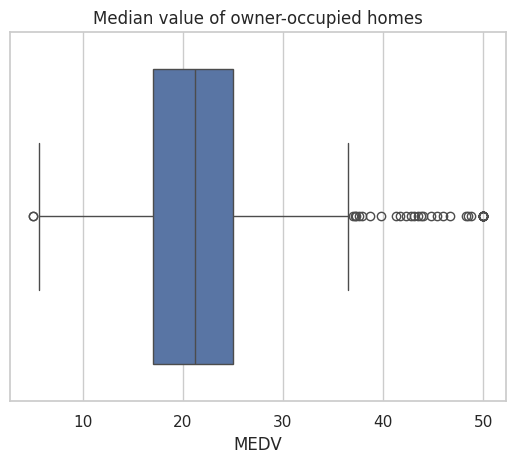

In [25]:
sns.set(style="whitegrid")
sns.boxplot(data = boston_df, x = 'MEDV', y = None).set(title='Median value of owner-occupied homes')

Provide a  bar plot for the Charles river variable

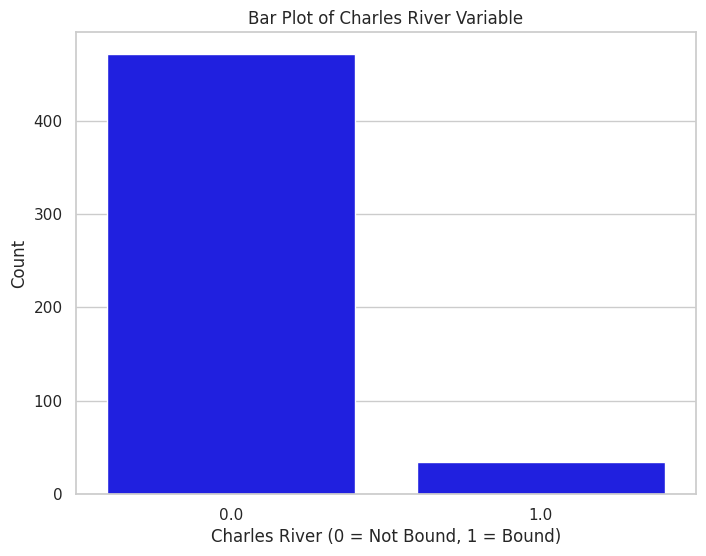

In [27]:
charles_river_counts = boston_df['CHAS'].value_counts()

pyplot.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df, color='blue')
pyplot.title("Bar Plot of Charles River Variable")
pyplot.xlabel("Charles River (0 = Not Bound, 1 = Bound)")
pyplot.ylabel("Count")

pyplot.show()

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 1.0, 'MEDV variable vs AGE variable')]

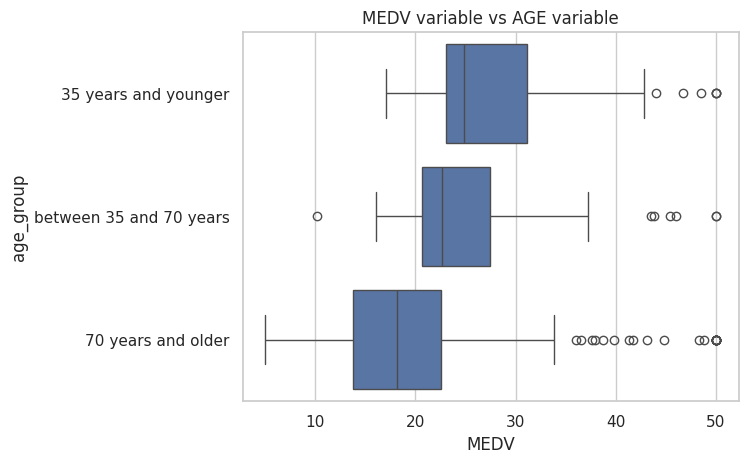

In [45]:
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

sns.boxplot(data = boston_df, x = 'MEDV', y = 'age_group').set(title = 'MEDV variable vs AGE variable')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

In [41]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           7.91e-98
Time:                        10:47:06   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.0

The correlation factor r is 0.763544366752843. There is a positive correlation between the 2 variables.


[Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')]

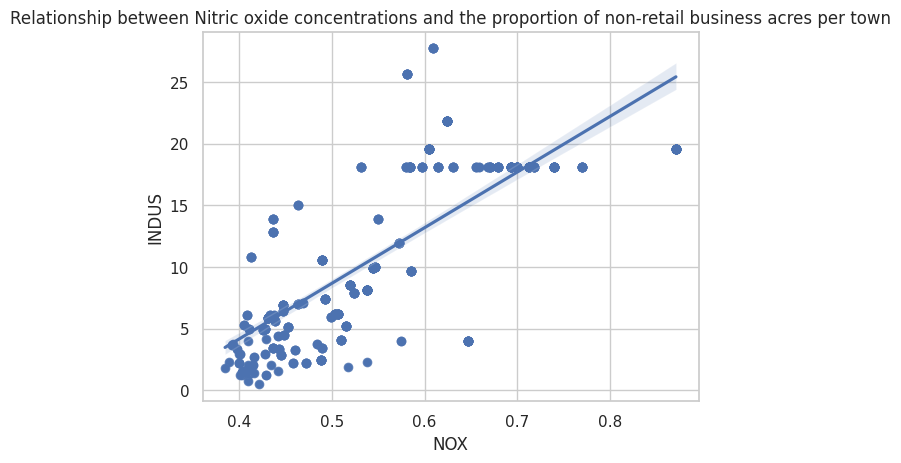

In [42]:
r = m.sqrt(0.583)
correlation = print(f'The correlation factor r is {r}. There is a positive correlation between the 2 variables.')

sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS')
sns.regplot(data = boston_df, x = 'NOX', y = 'INDUS').set(title = 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 1.0, 'Pupil to Teacher ratio')]

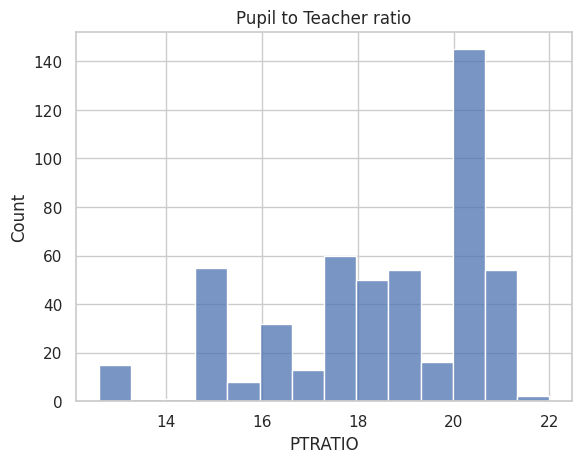

In [33]:
sns.histplot(data = boston_df, x = 'PTRATIO').set(title = 'Pupil to Teacher ratio')

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

For this task, we will consider the following hypothesis:

    H0 = The means of median value of houses bounded by the Charles river are equal
    H1 = the means of median value of houses bounded by the Charles river are not equal

In [34]:
import scipy.stats

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [35]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

For this task, we will consider the following hypothesis:

    H0: the means of median value of houses for each proprotion of owner by age are equal
    Ha: the means of median value of houses for each proprotion of owner by age are not all equal

In [36]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
seventy_lower = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
hundred_lower = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, seventy_lower, hundred_lower)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


an we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

For this task, we will consider the following hypothesis:

    H0: Nitric oxide concentrations are not correlated with proportion of non-retail business acres per town
    Ha: Nitric oxide concentrations are correlated with proportion of non-retail business acres per town

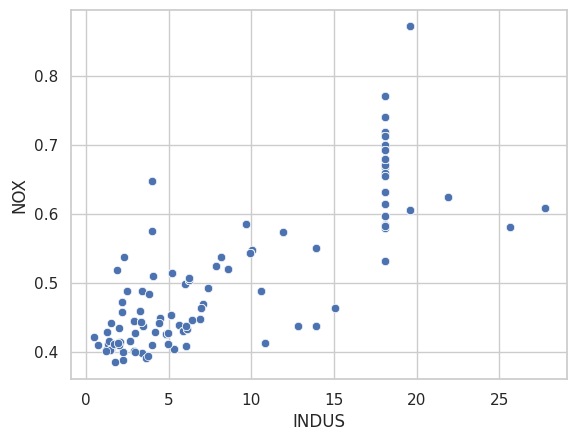

In [37]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [38]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

For this task, we will consider the following hypothesis:

    H0: additional weight distance to the five Boston employment centers has no effect on median value of owner occupied homes
    Ha: additional weight distance to the five Boston employment centers has an effect on median value of owner occupied homes

In [39]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        10:42:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""